<a href="https://colab.research.google.com/github/JuanD4vy/Sleep_health/blob/main/C%C3%B3digos/Sleep_health_and_lifestyle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Universidad Militar Nueva Granada***
**Juan David Aviles Palma**

**Programa de ingeniería en Telecomunicaciones**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#***0. IMPORT LIBRARIES***

In [2]:
# seed our random values for reproducible code
import numpy as np
np.random.seed(0)
import random
random.seed(0)

In [3]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.pipeline import Pipeline
import time

In [4]:
import pandas as pd

sleep_health = pd.read_csv('/content/drive/MyDrive/Machine Learning/DATA/Sleep_health_and_lifestyle_dataset.csv')
sleep_health_c = sleep_health.copy() # A copy of the dataset

#***1. EXPLORATORY DATA ANALYSIS***

In [5]:
sleep_health.head(10)  # take a look at the first 10 rows

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [6]:
sleep_health.shape  # 13 columns! and 374 observations

(374, 13)

In [7]:
sleep_health.isnull().mean()  # percent of missing data in each column
# Sleep Disorder (output) has no missing data.

Person ID                  0.000000
Gender                     0.000000
Age                        0.000000
Occupation                 0.000000
Sleep Duration             0.000000
Quality of Sleep           0.000000
Physical Activity Level    0.000000
Stress Level               0.000000
BMI Category               0.000000
Blood Pressure             0.000000
Heart Rate                 0.000000
Daily Steps                0.000000
Sleep Disorder             0.585561
dtype: float64

In [8]:
sleep_health['Sleep Disorder'].value_counts(normalize=True)  # percent breakdown of response variable

Sleep Disorder
Sleep Apnea    0.503226
Insomnia       0.496774
Name: proportion, dtype: float64

" *** Esto quiere decir que el Null Accuaracy debe rondar los 0.58 % *** "

In [9]:
sleep_health.info() # Dtype corresponds to the type of data
# Object is qualitative data.
# float64 is quantitative data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


# **3. FEATURE IMPROVEMENT**

In [10]:
del sleep_health['Person ID'] # Delete the Feature "Person ID"

In [11]:
numeric_types = ['float16', 'float32', 'float64', 'int16', 'int32', 'int64']           # the numeric types in Pandas

numerical_columns = sleep_health.select_dtypes(include=numeric_types).columns.tolist() # Put in a list the features with numerical format.

numerical_columns

['Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps']

No es necesario recurrir a la imputación de datos numéricos

In [12]:
categorical_types = ['O'] # The "object" type in pandas
categorical_columns = sleep_health.select_dtypes(include=categorical_types).columns.tolist() # List of categorical features
categorical_columns.remove('Sleep Disorder') # Remove the output
for categorical_column in categorical_columns:
  print('=======')
  print(categorical_column)
  print('=======')
  print(sleep_health[categorical_column].value_counts(dropna=False))

Gender
Gender
Male      189
Female    185
Name: count, dtype: int64
Occupation
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64
BMI Category
BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64
Blood Pressure
Blood Pressure
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
126/83     2
115/78     2
139/91     2
142/92     2
119/77     2
135/88     2
129/84     2
128/84     2
131/86     2
117/76     2
130/86     2
118/75     2
121/79     1
122/80     1
118/76     1
Name: count, dtype: int64


In [13]:
sleep_health['Female'] = sleep_health['Gender'] == 'F' # Turn our Sex column into a binary column. If Female, the result is True; otherwise is False.

In [14]:
sleep_health['Gender'].head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: Gender, dtype: object

In [15]:
sleep_health['Female'].head()

0    False
1    False
2    False
3    False
4    False
Name: Female, dtype: bool

In [16]:
for categorical_column in categorical_columns:
  print('=======')
  print(categorical_column)
  print('=======')
  print(sleep_health[categorical_column].value_counts(dropna=False))

Gender
Gender
Male      189
Female    185
Name: count, dtype: int64
Occupation
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64
BMI Category
BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64
Blood Pressure
Blood Pressure
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
126/83     2
115/78     2
139/91     2
142/92     2
119/77     2
135/88     2
129/84     2
128/84     2
131/86     2
117/76     2
130/86     2
118/75     2
121/79     1
122/80     1
118/76     1
Name: count, dtype: int64


In [17]:
del sleep_health['Gender'] # Delete the Feature "Gender".

In [18]:
sleep_health.head(10)

,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Female
0,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,False
1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,False
2,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,False
3,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,False
4,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,False
5,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,False
6,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia,False
7,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN,False
8,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN,False
9,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN,False


# **4. FEATURE CONSTRUCTION**


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sleep Duration'}>,
        <Axes: title={'center': 'Quality of Sleep'}>],
       [<Axes: title={'center': 'Physical Activity Level'}>,
        <Axes: title={'center': 'Stress Level'}>,
        <Axes: title={'center': 'Heart Rate'}>],
       [<Axes: title={'center': 'Daily Steps'}>, <Axes: >, <Axes: >]],
      dtype=object)

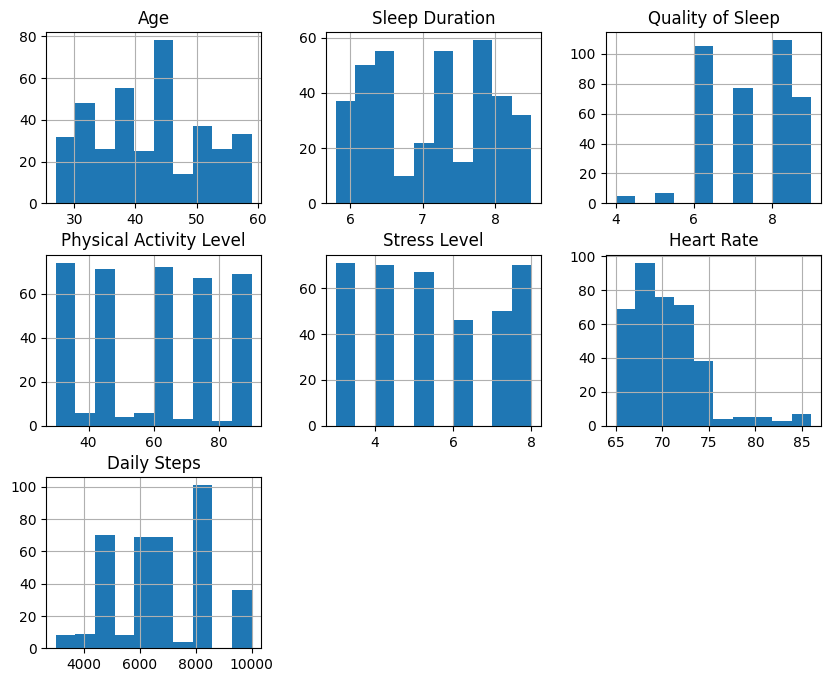

In [19]:
# Before log transform
sleep_health[numerical_columns].hist(figsize=(10, 8))

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sleep Duration'}>,
        <Axes: title={'center': 'Quality of Sleep'}>],
       [<Axes: title={'center': 'Physical Activity Level'}>,
        <Axes: title={'center': 'Stress Level'}>,
        <Axes: title={'center': 'Heart Rate'}>],
       [<Axes: title={'center': 'Daily Steps'}>, <Axes: >, <Axes: >]],
      dtype=object)

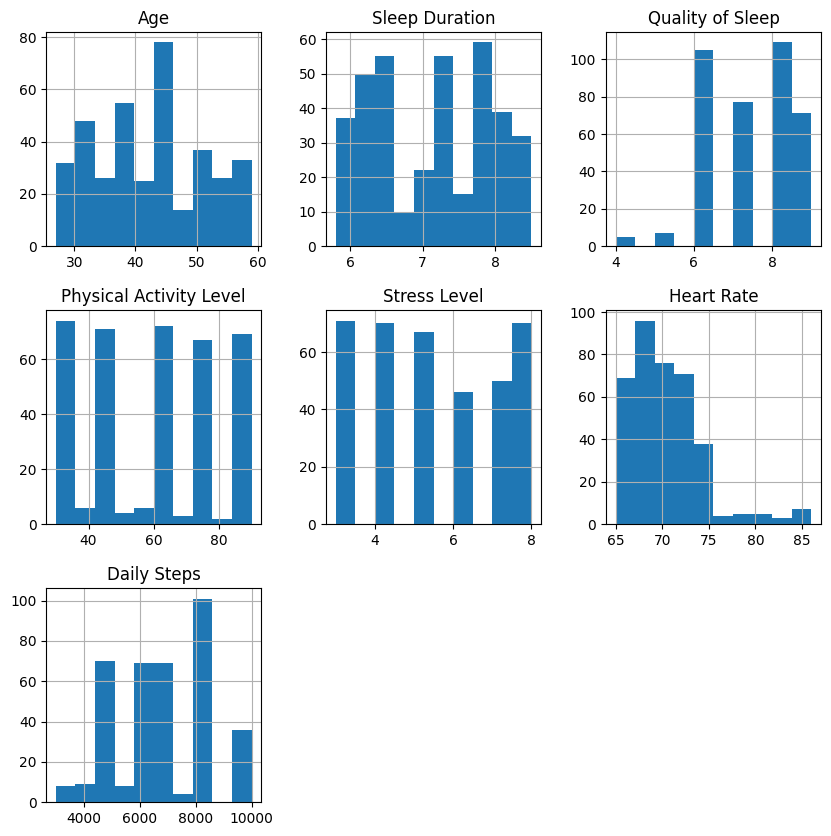

In [20]:
from sklearn.preprocessing import PowerTransformer

boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)
pd.DataFrame(sleep_health[numerical_columns]).hist(figsize=(10, 10)) # histograms before the box-cox transformation

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sleep Duration'}>,
        <Axes: title={'center': 'Quality of Sleep'}>],
       [<Axes: title={'center': 'Physical Activity Level'}>,
        <Axes: title={'center': 'Stress Level'}>,
        <Axes: title={'center': 'Heart Rate'}>],
       [<Axes: title={'center': 'Daily Steps'}>, <Axes: >, <Axes: >]],
      dtype=object)

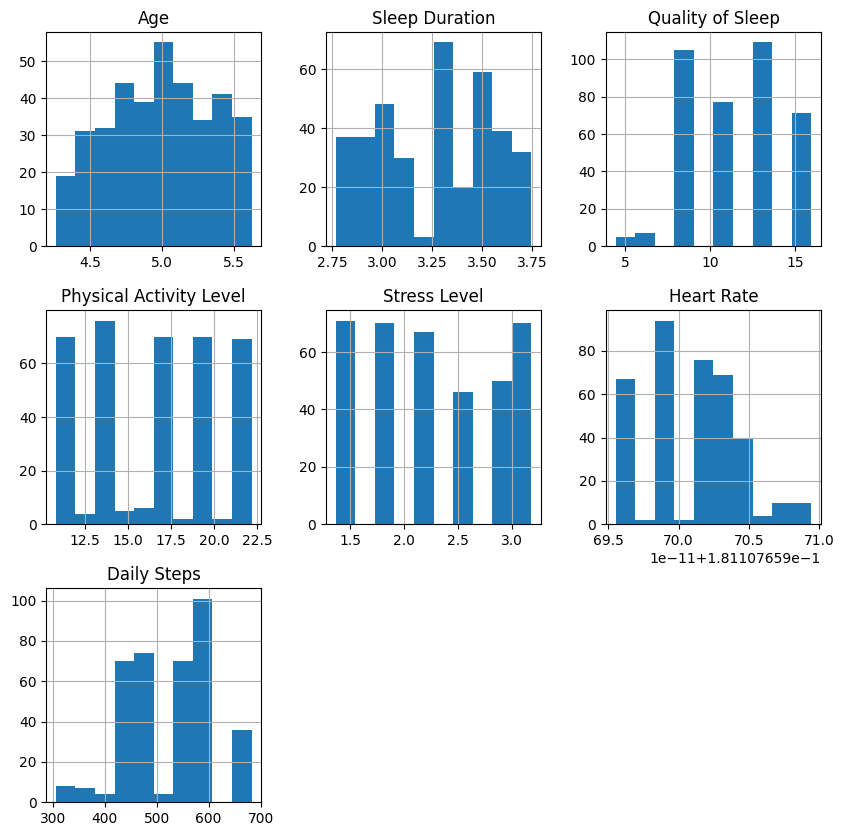

In [21]:
pd.DataFrame(
    boxcox_transformer.fit_transform(sleep_health[numerical_columns]),
    columns=numerical_columns
).hist(figsize=(10, 10)) # histograms after the box-cox transformation

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sleep Duration'}>,
        <Axes: title={'center': 'Quality of Sleep'}>],
       [<Axes: title={'center': 'Physical Activity Level'}>,
        <Axes: title={'center': 'Stress Level'}>,
        <Axes: title={'center': 'Heart Rate'}>],
       [<Axes: title={'center': 'Daily Steps'}>, <Axes: >, <Axes: >]],
      dtype=object)

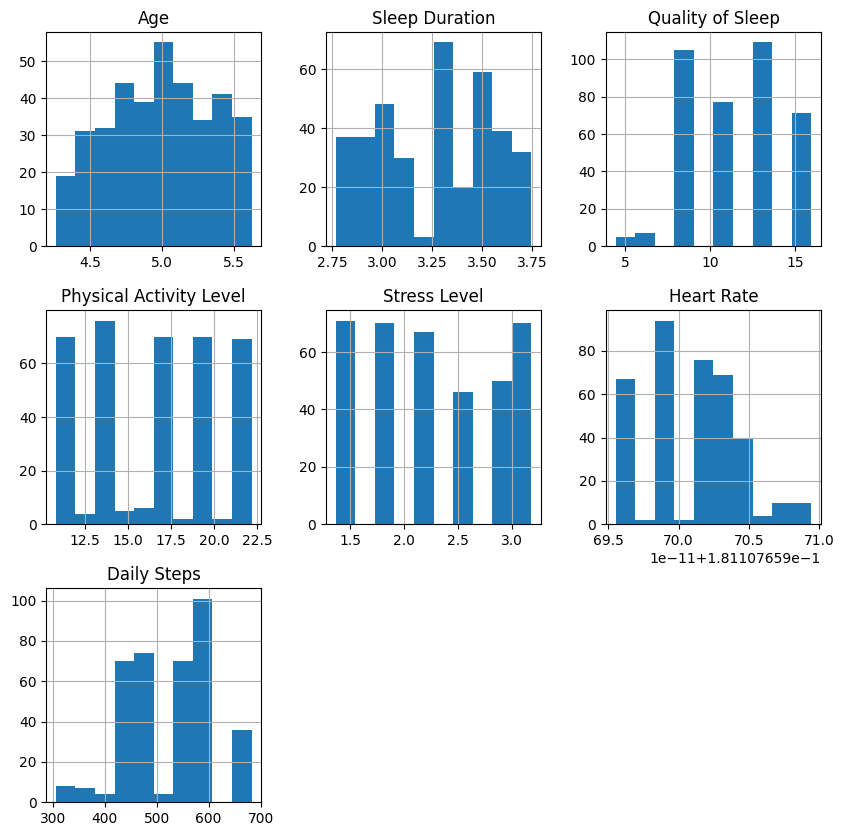

In [22]:
pd.DataFrame(
    boxcox_transformer.fit_transform(sleep_health[numerical_columns]),
    columns=numerical_columns
).hist(figsize=(10, 10)) # histograms after the box-cox transformation

In [23]:
sleep_health[numerical_columns].describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sleep Duration'}>,
        <Axes: title={'center': 'Quality of Sleep'}>],
       [<Axes: title={'center': 'Physical Activity Level'}>,
        <Axes: title={'center': 'Stress Level'}>,
        <Axes: title={'center': 'Heart Rate'}>],
       [<Axes: title={'center': 'Daily Steps'}>, <Axes: >, <Axes: >]],
      dtype=object)

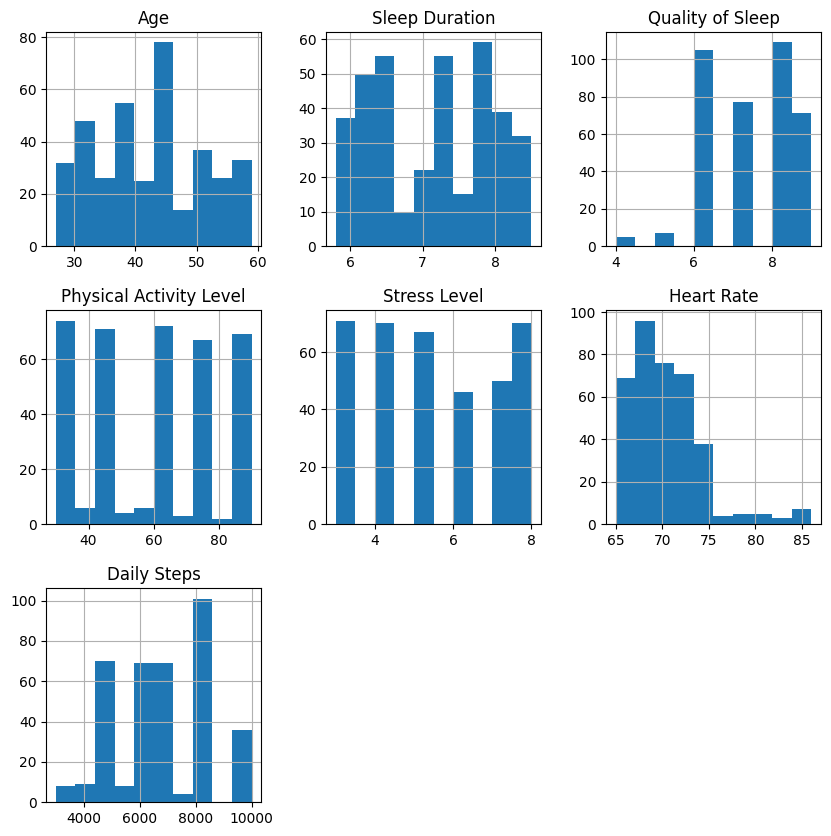

In [24]:
sleep_health[numerical_columns].hist(figsize=(10, 10))

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sleep Duration'}>,
        <Axes: title={'center': 'Quality of Sleep'}>],
       [<Axes: title={'center': 'Physical Activity Level'}>,
        <Axes: title={'center': 'Stress Level'}>,
        <Axes: title={'center': 'Heart Rate'}>],
       [<Axes: title={'center': 'Daily Steps'}>, <Axes: >, <Axes: >]],
      dtype=object)

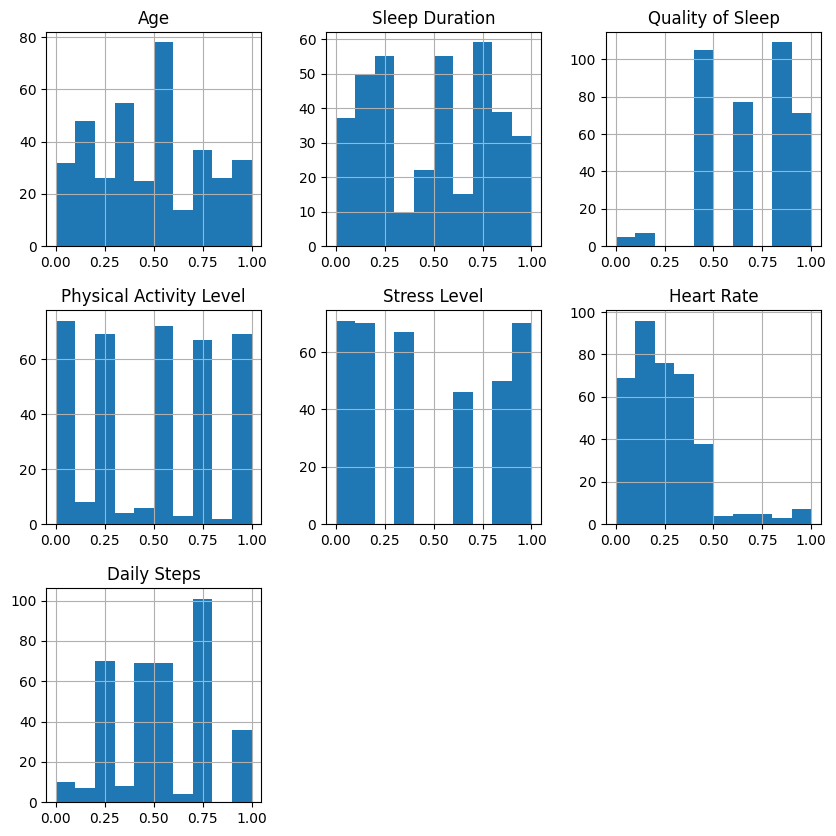

In [25]:
from sklearn.preprocessing import MinMaxScaler
pd.DataFrame(  # mean of 0 and std of 1 but ranges are different (see min and max)
    MinMaxScaler().fit_transform(sleep_health[numerical_columns]),
    columns=numerical_columns
).hist(figsize=(10, 10))

In [26]:
from sklearn.preprocessing import StandardScaler

pd.DataFrame(  # mean of 0 and std of 1 but ranges are different (see min and max)
    StandardScaler().fit_transform(sleep_health[numerical_columns]),
    columns=numerical_columns
).describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02
mean,-4.559633e-16,1.348891e-15,2.469801e-16,-3.324732e-17,1.994839e-16,-1.377389e-15,-9.499234e-17
std,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00
min,-1.753096e+00,-1.676439e+00,-2.771424e+00,-1.402260e+00,-1.345836e+00,-1.250750e+00,-2.362273e+00
25%,-8.006081e-01,-9.213348e-01,-1.098280e+00,-6.812078e-01,-7.815505e-01,-5.243827e-01,-7.531140e-01
50%,9.415288e-02,8.547080e-02,-2.617083e-01,3.984423e-02,-2.172650e-01,-4.013793e-02,1.133560e-01
75%,9.023241e-01,8.405750e-01,5.748635e-01,7.608963e-01,9.113060e-01,4.441068e-01,7.322631e-01
max,1.941401e+00,1.721530e+00,1.411435e+00,1.481948e+00,1.475592e+00,3.833820e+00,1.970077e+00


In [27]:
pd.DataFrame(  # mean and std are different but min and max are 0s and 1s
    MinMaxScaler().fit_transform(sleep_health[numerical_columns]),
    columns=numerical_columns
).describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,0.474515,0.493365,0.662567,0.486185,0.477005,0.245989,0.545264
std,0.271035,0.294688,0.239391,0.347180,0.354905,0.196937,0.231131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.257812,0.222222,0.400000,0.250000,0.200000,0.142857,0.371429
50%,0.500000,0.518519,0.600000,0.500000,0.400000,0.238095,0.571429
75%,0.718750,0.740741,0.800000,0.750000,0.800000,0.333333,0.714286
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**4.2. CONSTRUCTING CATEGORICAL DATA**

In [28]:
categorical_types = ['O']  # Just the "object" type

categorical_columns = sleep_health.select_dtypes(include=categorical_types).columns.tolist()

categorical_columns.remove('Sleep Disorder')  # our response variable

for categorical_column in categorical_columns:
    print('=======')
    print(categorical_column)
    print('=======')
    print(sleep_health[categorical_column].value_counts(dropna=False))

Occupation
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64
BMI Category
BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64
Blood Pressure
Blood Pressure
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
126/83     2
115/78     2
139/91     2
142/92     2
119/77     2
135/88     2
129/84     2
128/84     2
131/86     2
117/76     2
130/86     2
118/75     2
121/79     1
122/80     1
118/76     1
Name: count, dtype: int64


In [29]:
# Define una función para categorizar los valores
def categorize_pressure(value):
    systolic, diastolic = map(int, value.split('/'))

    if systolic <= 120 and diastolic <= 80:
        return "Normal"
    elif 120 <= systolic <= 129 and diastolic <= 80:
        return "Elevada"
    elif 130 <= systolic <= 139 and 80 <= diastolic <= 89:
        return "AltaN1"
    elif systolic >= 140 and diastolic >= 90:
        return "AltaN2"
    elif systolic >= 180 and diastolic >= 120:
        return "Crisis"
    else:
        return "Elevada"

# Aplica la función a la columna existente y crea una nueva columna
sleep_health["Blood Press"] = sleep_health["Blood Pressure"].apply(categorize_pressure)

In [30]:
del sleep_health['Blood Pressure'] # Delete the Feature "Gender".

In [31]:
sleep_health.head(10)

,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Female,Blood Press
0,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,False,Elevada
1,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,False,Elevada
2,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,False,Elevada
3,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,False,AltaN2
4,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,False,AltaN2
5,28,Software Engineer,5.9,4,30,8,Obese,85,3000,Insomnia,False,AltaN2
6,29,Teacher,6.3,6,40,7,Obese,82,3500,Insomnia,False,AltaN2
7,29,Doctor,7.8,7,75,6,Normal,70,8000,NaN,False,Normal
8,29,Doctor,7.8,7,75,6,Normal,70,8000,NaN,False,Normal
9,29,Doctor,7.8,7,75,6,Normal,70,8000,NaN,False,Normal


In [32]:
sleep_health['Blood Press'].value_counts(normalize=True)

Blood Press
Elevada    0.291444
AltaN1     0.288770
Normal     0.229947
AltaN2     0.189840
Name: proportion, dtype: float64

In [33]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Verificar las categorías únicas en la columna "BMI Category"
unique_categories = sleep_health['BMI Category'].unique()
print("Categorías únicas en 'BMI Category':", unique_categories)

# Crear un objeto OrdinalEncoder y definir el orden de las categorías
encoder = OrdinalEncoder(categories=[
    ['Normal', 'Normal Weight', 'Overweight', 'Obese']
])

# Ajustar el encoder a los datos de la columna 'BMI Category'
sleep_health['BMI'] = encoder.fit_transform(sleep_health[['BMI Category']])

# Verificar los datos transformados
print(sleep_health[['BMI Category', 'BMI']])

# Guardar el DataFrame actualizado con las categorías codificadas
sleep_health.to_csv('tu_archivo_actualizado.csv', index=False)

Categorías únicas en 'BMI Category': ['Overweight' 'Normal' 'Obese' 'Normal Weight']
    BMI Category  BMI
0     Overweight  2.0
1         Normal  0.0
2         Normal  0.0
3          Obese  3.0
4          Obese  3.0
..           ...  ...
369   Overweight  2.0
370   Overweight  2.0
371   Overweight  2.0
372   Overweight  2.0
373   Overweight  2.0

[374 rows x 2 columns]


In [34]:
# Verificar las categorías únicas en la columna "BMI Category"
unique_categories = sleep_health['Blood Press'].unique()
print("Categorías únicas en 'Blood Press':", unique_categories)

# Crear un objeto OrdinalEncoder y definir el orden de las categorías
encoder = OrdinalEncoder(categories=[
    ['Normal', 'Elevada', 'AltaN1', 'AltaN2', 'Crisis']
])

# Ajustar el encoder a los datos de la columna 'BMI Category'
sleep_health['Blood pressure'] = encoder.fit_transform(sleep_health[['Blood Press']])

# Verificar los datos transformados
print(sleep_health[['Blood Press', 'Blood pressure']])

# Guardar el DataFrame actualizado con las categorías codificadas
sleep_health.to_csv('tu_archivo_actualizado.csv', index=False)

Categorías únicas en 'Blood Press': ['Elevada' 'AltaN2' 'Normal' 'AltaN1']
    Blood Press  Blood pressure
0       Elevada             1.0
1       Elevada             1.0
2       Elevada             1.0
3        AltaN2             3.0
4        AltaN2             3.0
..          ...             ...
369      AltaN2             3.0
370      AltaN2             3.0
371      AltaN2             3.0
372      AltaN2             3.0
373      AltaN2             3.0

[374 rows x 2 columns]


In [35]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

class DummifyOccupation(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = None

    def fit(self, X, y=None):
        self.encoder = OneHotEncoder(sparse=False, drop='first')  # drop the first category to avoid multicollinearity
        Occupations = X.unique().reshape(-1, 1)  # reshape to match the input format
        self.encoder.fit(Occupations)
        return self

    def transform(self, X, y=None):
        Occupations = X.values.reshape(-1, 1)  # reshape to match the input format
        transformed_data = self.encoder.transform(Occupations)
        return transformed_data

# Apply the custom transformer
drf = DummifyOccupation()
Occup = drf.fit_transform(sleep_health['Occupation'])

# Create a DataFrame to show the results
result_df = pd.DataFrame(Occup, columns=drf.encoder.get_feature_names_out(['Occupation']))

print(result_df)

     Occupation_Doctor  Occupation_Engineer  Occupation_Lawyer  \
0                  0.0                  0.0                0.0   
1                  1.0                  0.0                0.0   
2                  1.0                  0.0                0.0   
3                  0.0                  0.0                0.0   
4                  0.0                  0.0                0.0   
..                 ...                  ...                ...   
369                0.0                  0.0                0.0   
370                0.0                  0.0                0.0   
371                0.0                  0.0                0.0   
372                0.0                  0.0                0.0   
373                0.0                  0.0                0.0   

     Occupation_Manager  Occupation_Nurse  Occupation_Sales Representative  \
0                   0.0               0.0                              0.0   
1                   0.0               0.0          

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [36]:
del sleep_health['BMI Category'] # Delete the Feature "Gender".

In [37]:
del sleep_health['Blood Press'] # Delete the Feature "Gender".

In [38]:
sleep_health.head(10)

,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Female,BMI,Blood pressure
0,27,Software Engineer,6.1,6,42,6,77,4200,NaN,False,2.0,1.0
1,28,Doctor,6.2,6,60,8,75,10000,NaN,False,0.0,1.0
2,28,Doctor,6.2,6,60,8,75,10000,NaN,False,0.0,1.0
3,28,Sales Representative,5.9,4,30,8,85,3000,Sleep Apnea,False,3.0,3.0
4,28,Sales Representative,5.9,4,30,8,85,3000,Sleep Apnea,False,3.0,3.0
5,28,Software Engineer,5.9,4,30,8,85,3000,Insomnia,False,3.0,3.0
6,29,Teacher,6.3,6,40,7,82,3500,Insomnia,False,3.0,3.0
7,29,Doctor,7.8,7,75,6,70,8000,NaN,False,0.0,0.0
8,29,Doctor,7.8,7,75,6,70,8000,NaN,False,0.0,0.0
9,29,Doctor,7.8,7,75,6,70,8000,NaN,False,0.0,0.0


# **5. BUILDING OUR FEATURE ENGINEERING PIPELINE**

In [42]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Supongamos que sleep_health es tu DataFrame
# Eliminar filas con valores nulos
sleep_health = sleep_health.dropna()

X = sleep_health.drop(['Sleep Disorder'], axis=1)
y = sleep_health['Sleep Disorder']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=0, test_size=.2
)

In [43]:
y_train.value_counts(normalize=True)

Sleep Disorder
Sleep Apnea    0.5
Insomnia       0.5
Name: proportion, dtype: float64

In [44]:
y_test.value_counts(normalize=True)

Sleep Disorder
Sleep Apnea    0.516129
Insomnia       0.483871
Name: proportion, dtype: float64

In [45]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion

# deal with Ocupation

Occupation_pipeline = Pipeline(
    [
        ('select_Occupation', FunctionTransformer(lambda df: df['Occupation'])),
        ('dummify', DummifyOccupation())
    ]
)

# deal with numerical columns

numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
    ]
)

In [46]:
def simple_grid_search(x_train, y_train, x_test, y_test, feature_engineering_pipeline):

    params = {  # some simple parameters to grid search
        'max_depth': [10, None],
        'n_estimators': [10, 50, 100, 500],
        'criterion': ['gini', 'entropy']
    }

    base_model = ExtraTreesClassifier()

    model_grid_search = GridSearchCV(base_model, param_grid=params, cv=3)
    start_time = time.time()  # capture the start time
    if feature_engineering_pipeline:  # fit FE pipeline to training data and use it to transform test data
        parsed_x_train = feature_engineering_pipeline.fit_transform(x_train, y_train)
        parsed_x_test = feature_engineering_pipeline.transform(x_test)
    else:
        parsed_x_train = x_train
        parsed_x_test = x_test

    parse_time = time.time()
    print(f"Parsing took {(parse_time - start_time):.2f} seconds")

    model_grid_search.fit(parsed_x_train, y_train)
    fit_time = time.time()
    print(f"Training took {(fit_time - start_time):.2f} seconds")

    best_model = model_grid_search.best_estimator_

    print(classification_report(y_true=y_test, y_pred=best_model.predict(parsed_x_test)))
    end_time = time.time()
    print(f"Overall took {(end_time - start_time):.2f} seconds")

    return best_model

In [47]:
# only using numerical values has a good precision on COVID class but awful recall.
simple_grid_search(x_train, y_train, x_test, y_test, numerical_pipeline)

Parsing took 0.00 seconds
Training took 10.78 seconds
              precision    recall  f1-score   support

    Insomnia       0.75      1.00      0.86        15
 Sleep Apnea       1.00      0.69      0.81        16

    accuracy                           0.84        31
   macro avg       0.88      0.84      0.84        31
weighted avg       0.88      0.84      0.84        31

Overall took 10.79 seconds


ExtraTreesClassifier(n_estimators=10)

In [48]:
# only using risk factors has a horrible recall and accuracy is barely higher than the null accuracy
simple_grid_search(x_train, y_train, x_test, y_test, Occupation_pipeline)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Parsing took 0.00 seconds
Training took 10.34 seconds
              precision    recall  f1-score   support

    Insomnia       0.78      0.93      0.85        15
 Sleep Apnea       0.92      0.75      0.83        16

    accuracy                           0.84        31
   macro avg       0.85      0.84      0.84        31
weighted avg       0.85      0.84      0.84        31

Overall took 10.35 seconds


ExtraTreesClassifier(max_depth=10, n_estimators=10)

In [49]:
# Use our cross-validation function to show the best classification report (best == highest test set accuracy)
# We  will use this as a baseline performance indicator for our next feature engineering attempts

simple_fe = FeatureUnion([  # put all of our features together
    ('Occupation', Occupation_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

simple_fe.fit_transform(x_train, y_train).shape

best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Parsing took 0.01 seconds
Training took 10.85 seconds
              precision    recall  f1-score   support

    Insomnia       0.83      1.00      0.91        15
 Sleep Apnea       1.00      0.81      0.90        16

    accuracy                           0.90        31
   macro avg       0.92      0.91      0.90        31
weighted avg       0.92      0.90      0.90        31

Overall took 10.86 seconds
